Frequent Itemsets:
frozenset({'C'})
frozenset({'E'})
frozenset({'B'})
frozenset({'D'})
frozenset({'A'})
frozenset({'C', 'E'})
frozenset({'D', 'E'})
frozenset({'B', 'C'})
frozenset({'B', 'D'})
frozenset({'C', 'D'})
frozenset({'A', 'B'})
frozenset({'A', 'D'})
frozenset({'A', 'C'})
frozenset({'B', 'E'})
frozenset({'A', 'E'})
frozenset({'B', 'C', 'E'})
frozenset({'B', 'D', 'E'})
frozenset({'B', 'C', 'D'})
frozenset({'A', 'C', 'D'})
frozenset({'A', 'C', 'E'})
frozenset({'A', 'D', 'E'})
frozenset({'C', 'D', 'E'})
frozenset({'A', 'B', 'D'})
frozenset({'A', 'B', 'C'})
frozenset({'A', 'B', 'E'})
frozenset({'B', 'A', 'C', 'E'})
frozenset({'B', 'D', 'A', 'E'})
frozenset({'B', 'D', 'C', 'E'})

Association Rules:
frozenset({'C'}) => frozenset({'E'}) (Support: 79, Confidence: 1.2950819672131149)
frozenset({'D'}) => frozenset({'E'}) (Support: 75, Confidence: 1.3157894736842106)
frozenset({'B'}) => frozenset({'C'}) (Support: 87, Confidence: 1.3181818181818181)
frozenset({'B'}) => frozenset({'D'}) (Sup

C:\Users\avisa\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


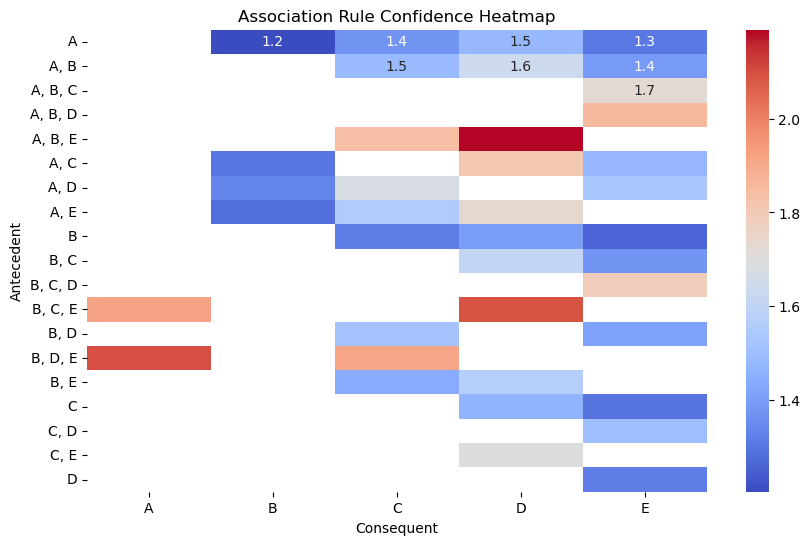

In [2]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def generate_synthetic_dataset(num_transactions, items_per_transaction, possible_items):
    """
    Generate a synthetic dataset with random transactions.
    """
    transactions = [set(np.random.choice(possible_items, size=items_per_transaction, replace=False)) for _ in range(num_transactions)]
    return transactions

def generate_candidates(prev_candidates, k):
    """
    Generate candidate itemsets of size k using the previous sets of size k-1.
    """
    candidates = set()
    for itemset1 in prev_candidates:
        for itemset2 in prev_candidates:
            union_set = itemset1.union(itemset2)
            if len(union_set) == k:
                candidates.add(union_set)
    return candidates

def calculate_support(transactions, candidate, min_support):
    """
    Calculate support for a candidate itemset.
    """
    count = sum(1 for transaction in transactions if candidate.issubset(transaction))
    support = count / len(transactions)
    return support >= min_support, count

def apriori(transactions, min_support, min_confidence):
    """
    Apriori algorithm for association rule learning.
    """
    # Initialize candidates with single items
    candidates = [frozenset([item]) for item in set(itertools.chain.from_iterable(transactions))]
    k = 2
    frequent_itemsets = []

    while candidates:
        # Calculate support for each candidate
        supports = [calculate_support(transactions, candidate, min_support) for candidate in candidates]
        
        # Filter candidates that meet the minimum support threshold
        frequent_candidates = [candidate for (is_supported, count), candidate in zip(supports, candidates) if is_supported]
        
        # Add frequent itemsets to the result
        frequent_itemsets.extend(frequent_candidates)
        
        # Generate new candidates of size k
        candidates = generate_candidates(frequent_candidates, k)
        k += 1

    # Generate association rules
    association_rules = []
    for itemset in frequent_itemsets:
        for i in range(1, len(itemset)):
            antecedent = frozenset(itemset - set([list(itemset)[i]]))
            consequent = frozenset([list(itemset)[i]])

            support_antecedent = calculate_support(transactions, antecedent, min_support)[1]
            confidence = support_antecedent / calculate_support(transactions, itemset, min_support)[1]

            if confidence >= min_confidence:
                association_rules.append((antecedent, consequent, support_antecedent, confidence))

    return frequent_itemsets, association_rules

def plot_association_rules(association_rules):
    """
    Plot a heatmap of association rule metrics.
    """
    df_rules = pd.DataFrame(association_rules, columns=['Antecedent', 'Consequent', 'Support', 'Confidence'])
    df_rules['Antecedent'] = df_rules['Antecedent'].apply(lambda x: ', '.join(list(x)))
    df_rules['Consequent'] = df_rules['Consequent'].apply(lambda x: ', '.join(list(x)))

    plt.figure(figsize=(10, 6))
    sns.heatmap(df_rules.pivot(index='Antecedent', columns='Consequent', values='Confidence'), annot=True, cmap='coolwarm')
    plt.title('Association Rule Confidence Heatmap')
    plt.show()

# Generate synthetic dataset
np.random.seed(42)
num_transactions = 100
items_per_transaction = 4
possible_items = ['A', 'B', 'C', 'D', 'E']
transactions = generate_synthetic_dataset(num_transactions, items_per_transaction, possible_items)

# Apriori algorithm
min_support = 0.2
min_confidence = 0.7
frequent_itemsets, association_rules = apriori(transactions, min_support, min_confidence)

# Display results
print("Frequent Itemsets:")
for itemset in frequent_itemsets:
    print(itemset)

print("\nAssociation Rules:")
for antecedent, consequent, support, confidence in association_rules:
    print(f"{antecedent} => {consequent} (Support: {support}, Confidence: {confidence})")

# Plot association rule metrics
plot_association_rules(association_rules)


C:\Users\avisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


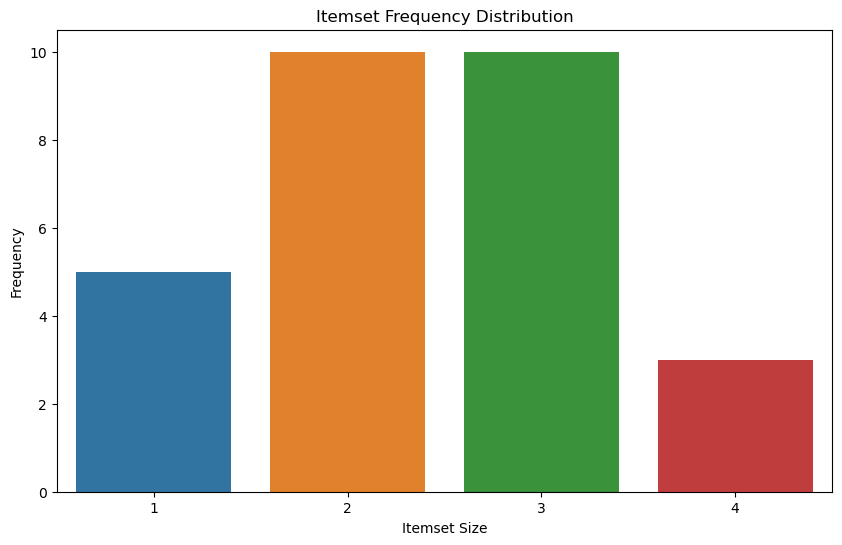

In [3]:
def plot_itemset_frequency_distribution(frequent_itemsets):
    """
    Plot a bar chart for itemset frequency distribution.
    """
    itemset_sizes = [len(itemset) for itemset in frequent_itemsets]
    plt.figure(figsize=(10, 6))
    sns.countplot(x=itemset_sizes)
    plt.title('Itemset Frequency Distribution')
    plt.xlabel('Itemset Size')
    plt.ylabel('Frequency')
    plt.show()

# Usage
plot_itemset_frequency_distribution(frequent_itemsets)


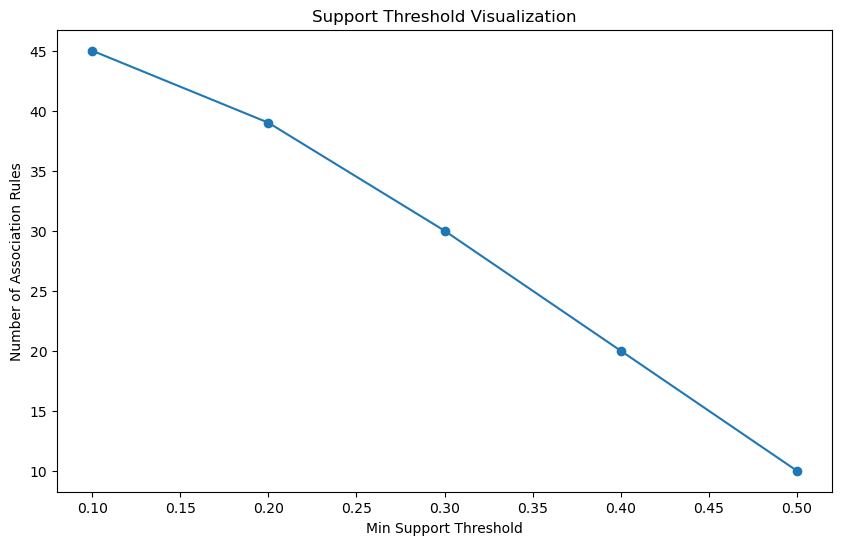

In [4]:
def plot_support_threshold_visualization(transactions, min_support_range):
    """
    Plot support threshold visualization.
    """
    support_values = []
    for min_support in min_support_range:
        _, association_rules = apriori(transactions, min_support, min_confidence)
        support_values.append(len(association_rules))

    plt.figure(figsize=(10, 6))
    plt.plot(min_support_range, support_values, marker='o')
    plt.title('Support Threshold Visualization')
    plt.xlabel('Min Support Threshold')
    plt.ylabel('Number of Association Rules')
    plt.show()

# Usage
min_support_range = [0.1, 0.2, 0.3, 0.4, 0.5]
plot_support_threshold_visualization(transactions, min_support_range)


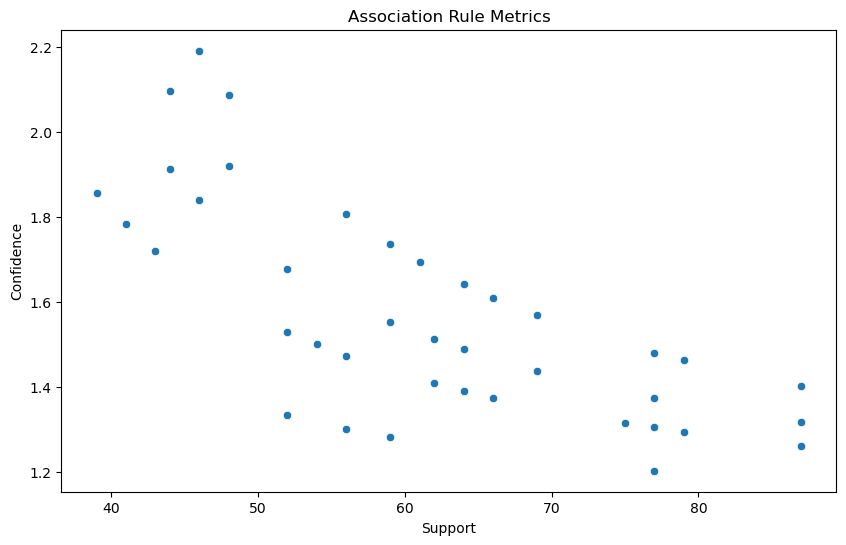

In [5]:
def plot_association_rule_metrics(association_rules):
    """
    Plot a scatter plot for association rule metrics.
    """
    df_rules = pd.DataFrame(association_rules, columns=['Antecedent', 'Consequent', 'Support', 'Confidence'])

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Support', y='Confidence', data=df_rules)
    plt.title('Association Rule Metrics')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.show()

# Usage
plot_association_rule_metrics(association_rules)


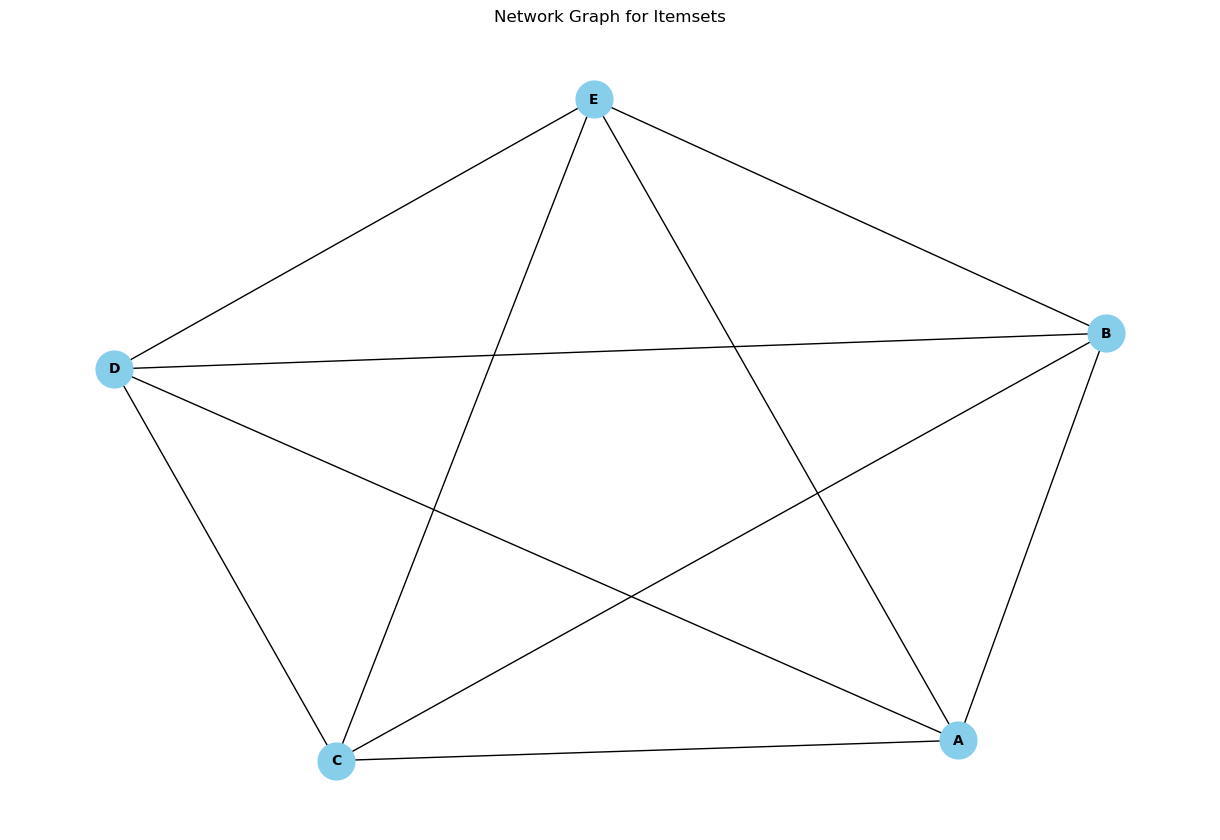

In [6]:
import networkx as nx

def plot_itemset_network_graph(frequent_itemsets):
    """
    Plot a network graph for itemsets.
    """
    G = nx.Graph()

    for itemset in frequent_itemsets:
        G.add_nodes_from(itemset)
        G.add_edges_from(itertools.combinations(itemset, 2))

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color='skyblue', font_color='black', font_weight='bold')
    plt.title('Network Graph for Itemsets')
    plt.show()

# Usage
plot_itemset_network_graph(frequent_itemsets)


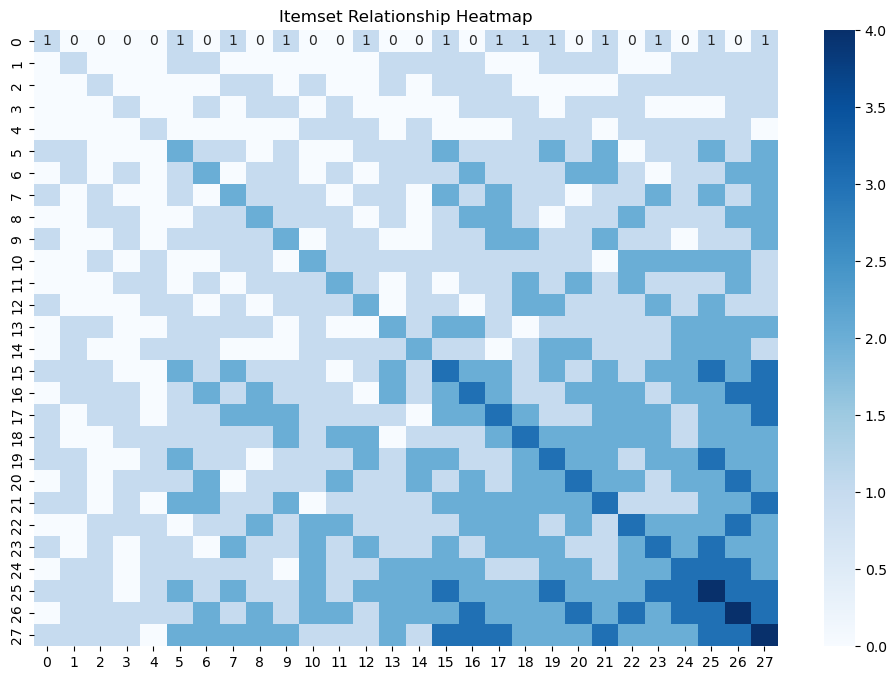

In [7]:
def plot_itemset_relationship_heatmap(frequent_itemsets):
    """
    Plot a heatmap for itemset relationships.
    """
    itemset_matrix = pd.DataFrame(0, index=range(len(frequent_itemsets)), columns=range(len(frequent_itemsets)))

    for i, itemset1 in enumerate(frequent_itemsets):
        for j, itemset2 in enumerate(frequent_itemsets):
            itemset_matrix.iloc[i, j] = len(itemset1.intersection(itemset2))

    plt.figure(figsize=(12, 8))
    sns.heatmap(itemset_matrix, cmap='Blues', annot=True, fmt='d')
    plt.title('Itemset Relationship Heatmap')
    plt.show()

# Usage
plot_itemset_relationship_heatmap(frequent_itemsets)


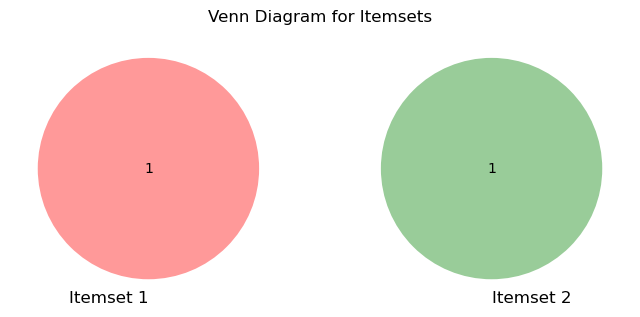

In [10]:
from matplotlib_venn import venn2

def plot_venn_diagram(itemset1, itemset2):
    """
    Plot a Venn diagram for two itemsets.
    """
    plt.figure(figsize=(8, 8))
    venn2([set(itemset1), set(itemset2)], set_labels=('Itemset 1', 'Itemset 2'))
    plt.title('Venn Diagram for Itemsets')
    plt.show()

# Usage (modify indices as needed)
itemset1 = frequent_itemsets[0]
itemset2 = frequent_itemsets[1]
plot_venn_diagram(itemset1, itemset2)


C:\Users\avisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


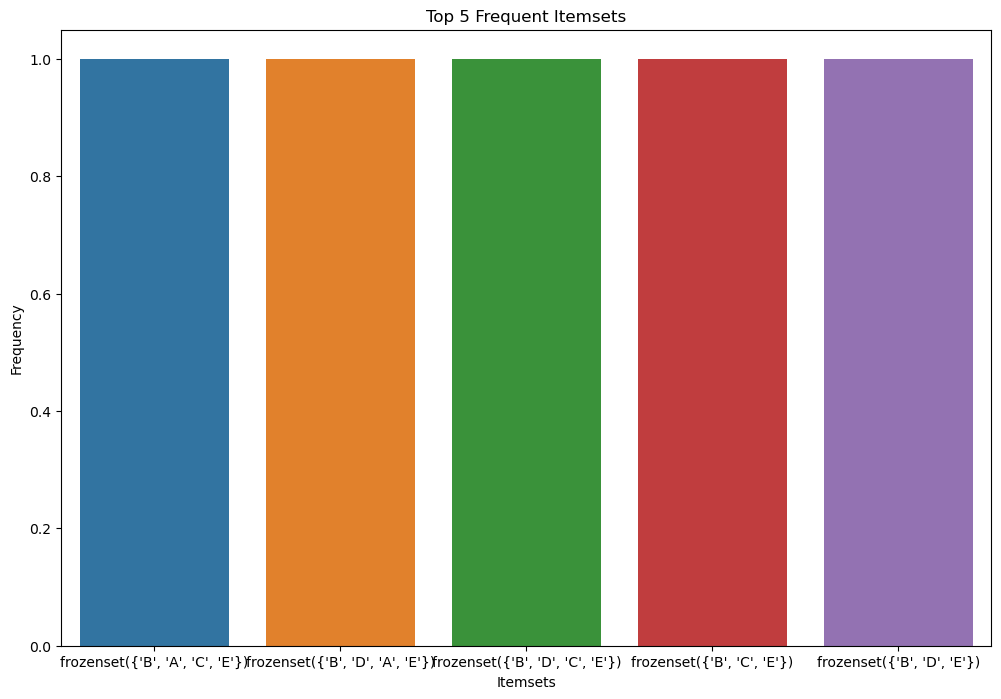

In [11]:
def plot_top_n_itemsets(frequent_itemsets, n):
    """
    Plot the top N frequent itemsets.
    """
    sorted_itemsets = sorted(frequent_itemsets, key=lambda x: len(x), reverse=True)[:n]

    plt.figure(figsize=(12, 8))
    sns.countplot(x=sorted_itemsets)
    plt.title(f'Top {n} Frequent Itemsets')
    plt.xlabel('Itemsets')
    plt.ylabel('Frequency')
    plt.show()

# Usage (specify N)
top_n = 5
plot_top_n_itemsets(frequent_itemsets, top_n)


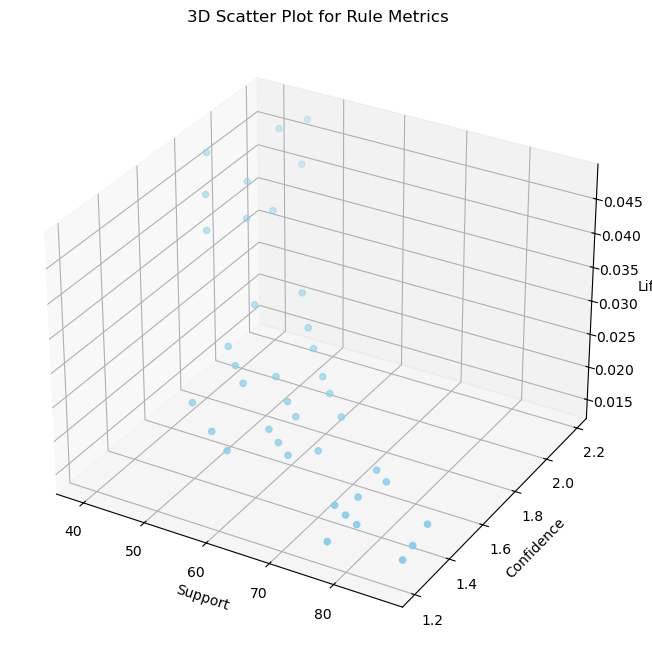

In [21]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter_rule_metrics(association_rules):
    """
    Plot a 3D scatter plot for association rule metrics.
    """
    df_rules = pd.DataFrame(association_rules, columns=['Antecedent', 'Consequent', 'Support', 'Confidence'])

    # Calculate Lift
    df_rules['Lift'] = df_rules['Confidence'] / df_rules['Support']

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df_rules['Support'], df_rules['Confidence'], df_rules['Lift'], c='skyblue', marker='o')

    ax.set_xlabel('Support')
    ax.set_ylabel('Confidence')
    ax.set_zlabel('Lift')

    plt.title('3D Scatter Plot for Rule Metrics')
    plt.show()

# Usage
plot_3d_scatter_rule_metrics(association_rules)


In [18]:
from pymining import seqmining

def mine_sequential_patterns_pymining(transactions, min_support):
    """
    Mine sequential patterns using the spade algorithm from pymining.
    """
    sequences = [tuple(transaction) for transaction in transactions]
    patterns = seqmining.freq_seq_enum(sequences, min_support=min_support)
    return patterns

# Usage
min_support_seq = 0.2
sequential_patterns_pymining = mine_sequential_patterns_pymining(transactions, min_support_seq)
print("Sequential Patterns (pymining):")
for pattern in sequential_patterns_pymining:
    print(pattern)


Sequential Patterns (pymining):
(('A', 'C'), 56)
(('C',), 79)
(('C', 'D', 'E'), 36)
(('C', 'E'), 61)
(('A',), 77)
(('B', 'C'), 66)
(('A', 'D', 'E'), 34)
(('A', 'B'), 64)
(('B',), 87)
(('A', 'C', 'D'), 31)
(('A', 'D'), 52)
(('D',), 75)
(('A', 'B', 'D', 'E'), 21)
(('D', 'E'), 57)
(('B', 'C', 'D'), 41)
(('B', 'D'), 62)
(('B', 'C', 'D', 'E'), 23)
(('A', 'B', 'C'), 43)
(('C', 'D'), 54)
(('B', 'E'), 69)
(('A', 'B', 'D'), 39)
(('A', 'B', 'E'), 46)
(('A', 'E'), 59)
(('A', 'C', 'D', 'E'), 13)
(('B', 'C', 'E'), 48)
(('A', 'B', 'C', 'D'), 18)
(('A', 'C', 'E'), 38)
(('E',), 82)
(('B', 'D', 'E'), 44)
(('A', 'B', 'C', 'E'), 25)
